# Boston Housing Price Prediction using DNN (Linear Regression)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
boston_d = tf.keras.datasets.boston_housing
boston = boston_d.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/home/anno/Documents/youtube/DL/.venv/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


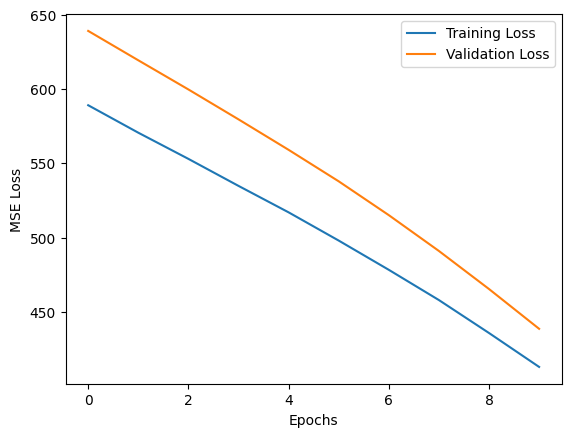

In [17]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [18]:
mse = model.evaluate(x_test, y_test, verbose=0)
print("Test MSE:", mse)

Test MSE: 401.723876953125
